In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
min_threshold = 1                      # these values are used to filter our detector.
max_threshold = 2000                     # they can be tweaked depending on the camera distance, camera angle, ...
min_area = 100                         # ... focus, brightness, etc.
min_circularity = .2
min_inertia_ratio = .5

# Load an color image in color (1), grayscale (0), or unchanged (-1)
img = cv2.imread('dice.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = cv2.imread('dice.jpg',0)
hsv_img = cv2.imread('dice.jpg',1)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
denoised_img2 = cv2.fastNlMeansDenoisingColored(hsv_img,None,15,15,7,21)
denoised_img = cv2.fastNlMeansDenoisingColored(img,None,15,15,7,21)
grey_denoised_img = cv2.fastNlMeansDenoising(grey_img,None,15,7,21)

# Desired operations done here
params = cv2.SimpleBlobDetector_Params()                # declare filter parameters.
params.filterByArea = True
params.filterByCircularity = True
#params.filterByInertia = True
#params.minThreshold = min_threshold
#params.maxThreshold = max_threshold
params.minArea = min_area
#params.minCircularity = min_circularity
#params.minInertiaRatio = min_inertia_ratio
 
detector = cv2.SimpleBlobDetector_create(params)        # create a blob detector object.

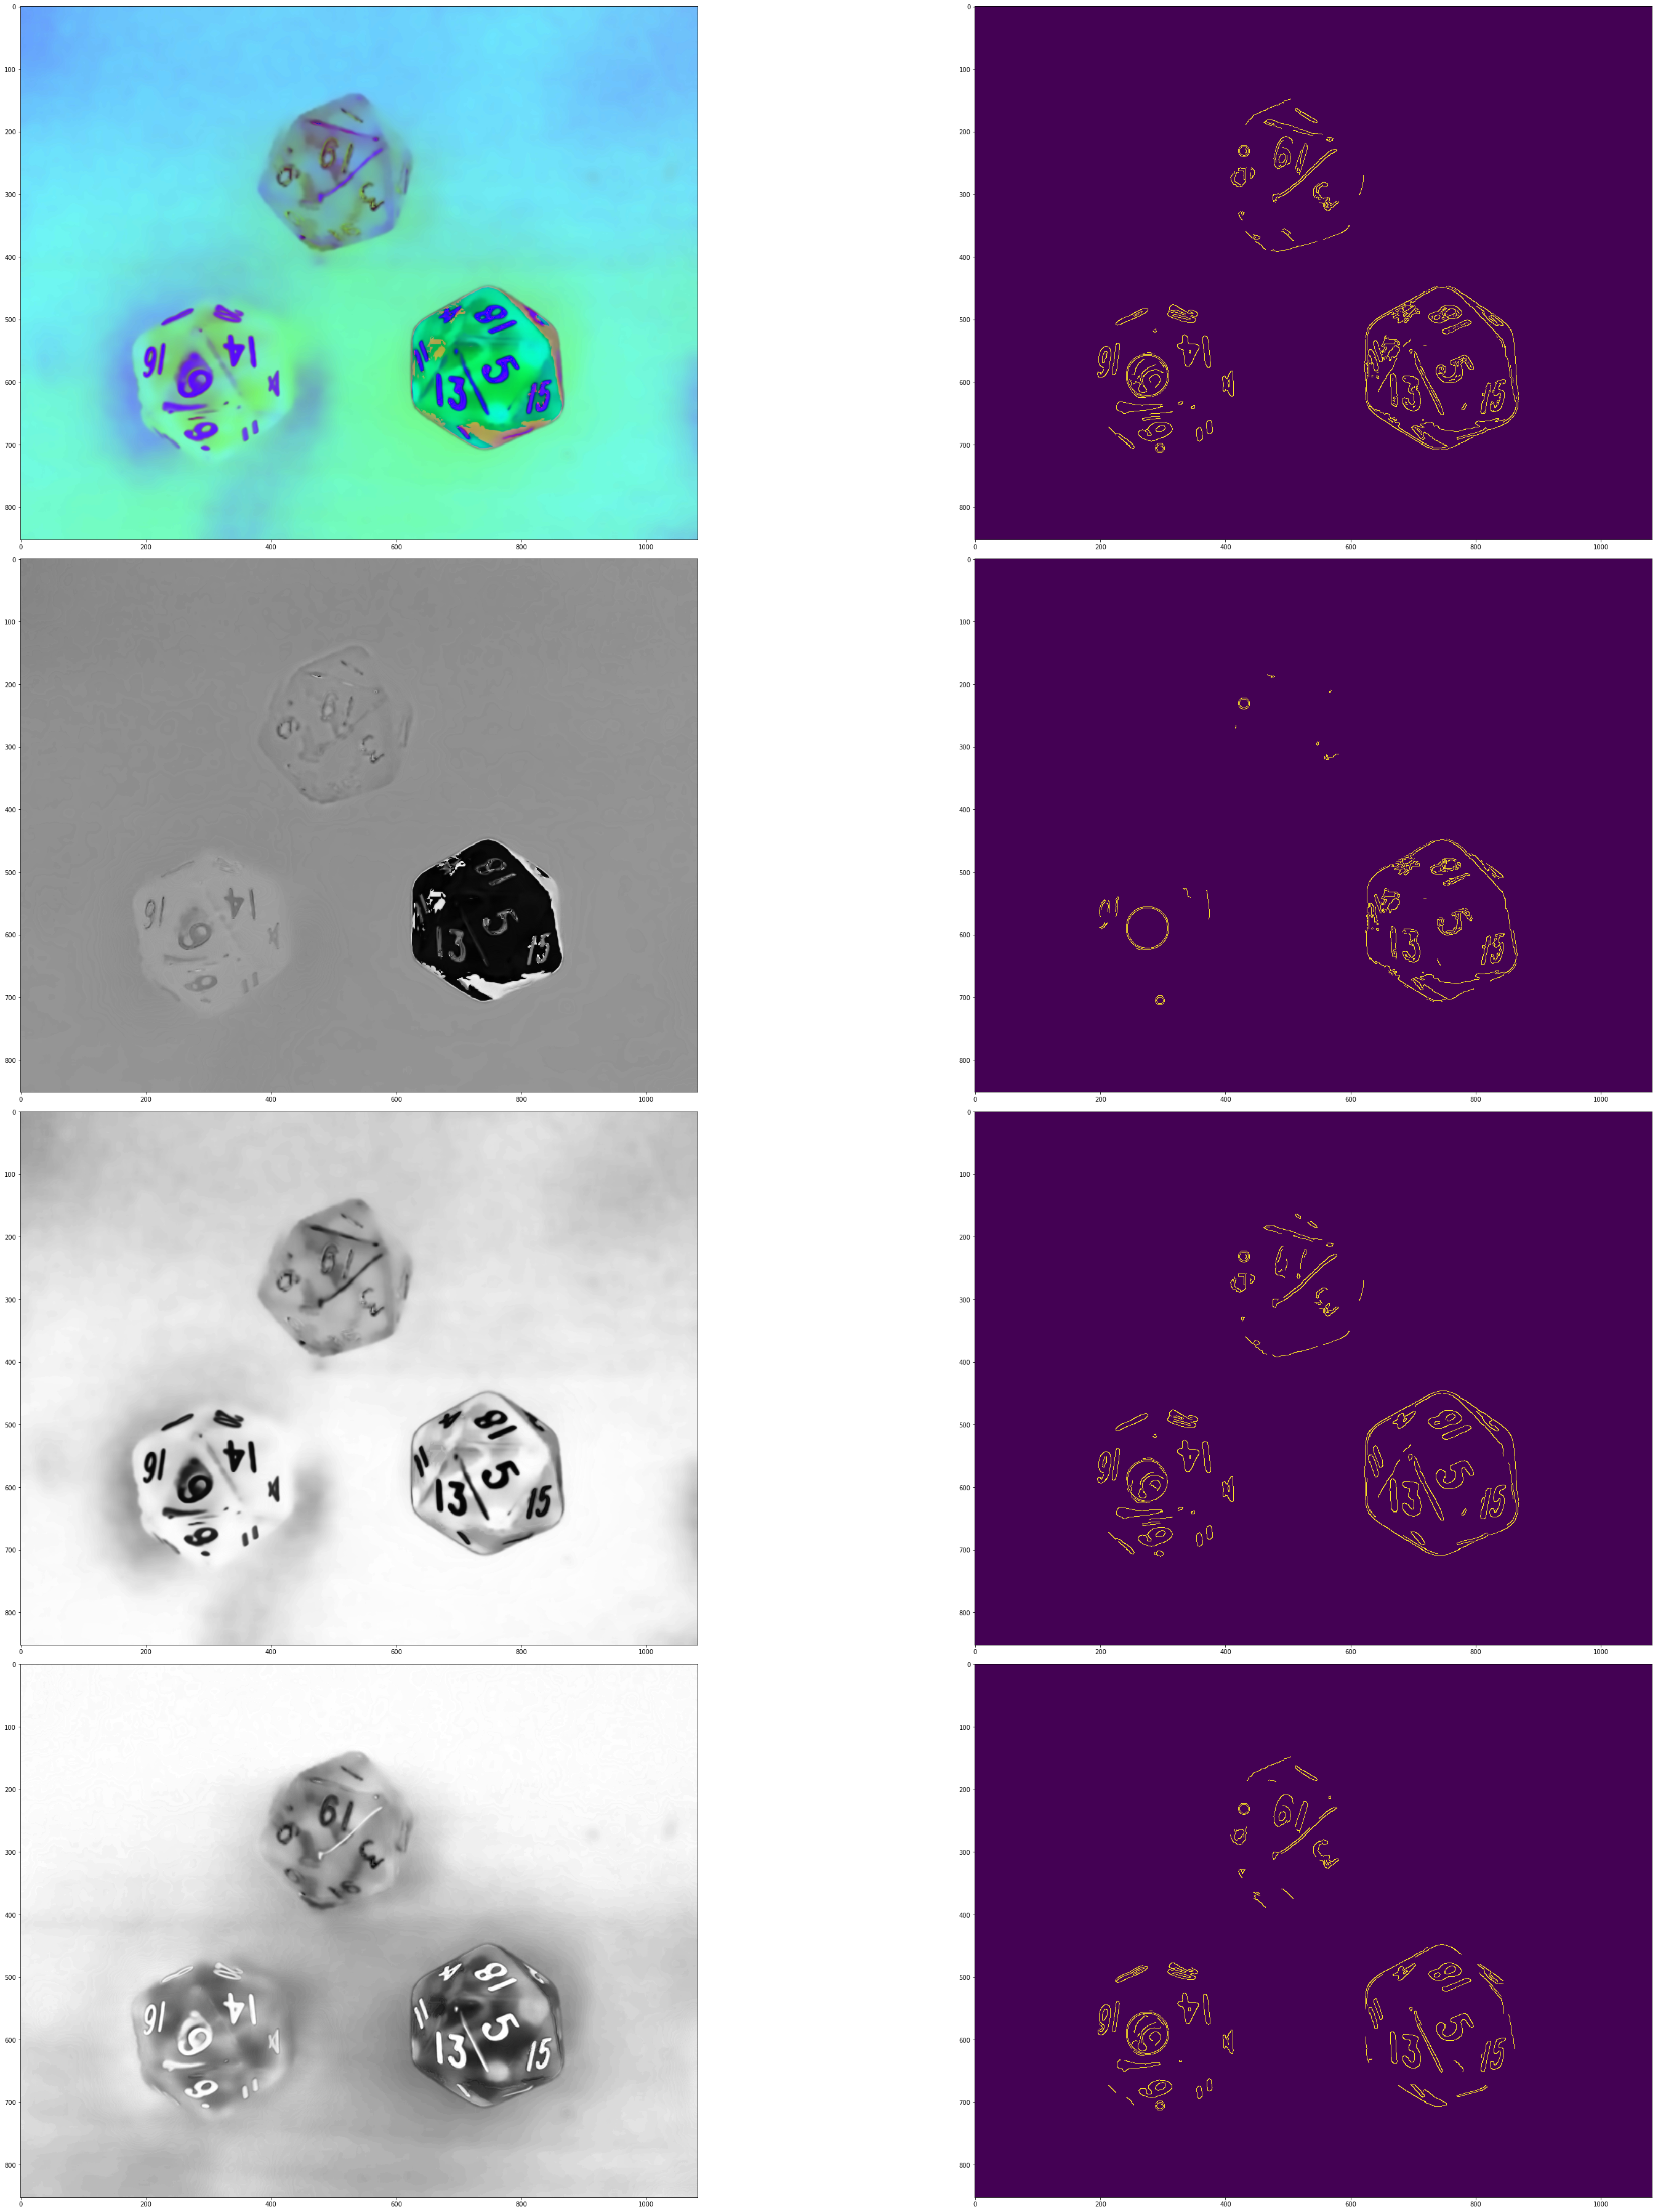

In [3]:
keypoints = detector.detect(denoised_img2)                         # keypoints is a list containing the detected blobs.
# here we draw keypoints on the frame.
img_with_keypoints = cv2.drawKeypoints(denoised_img2, keypoints, np.array([]), (0, 255, 0),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

full_filter = cv2.Canny(img_with_keypoints,100,200)
filter1 = cv2.Canny(img_with_keypoints[:,:,0],100,200)#hue
filter2 = cv2.Canny(img_with_keypoints[:,:,1],100,200)#sat
filter3 = cv2.Canny(img_with_keypoints[:,:,2],100,200)#value

f, axarr = plt.subplots(4,2,figsize=(50,50))
axarr[0,0].imshow(img_with_keypoints)
axarr[0,1].imshow(full_filter)
axarr[1,0].imshow(img_with_keypoints[:,:,0], cmap='gray')
axarr[1,1].imshow(filter1)
axarr[2,0].imshow(img_with_keypoints[:,:,1], cmap='gray')
axarr[2,1].imshow(filter2)
axarr[3,0].imshow(img_with_keypoints[:,:,2], cmap='gray')
axarr[3,1].imshow(filter3)

plt.tight_layout()
plt.show()

In [101]:
# cv2.imshow("Dice Reader", img_with_keypoints)            # display the frame with keypoints added.
# reading = len(keypoints)                                # 'reading' counts the number of keypoints (pips).
# k = cv2.waitKey(0) & 0xFF
# #if k == 27:         # wait for ESC key to exit
# cv2.destroyAllWindows()

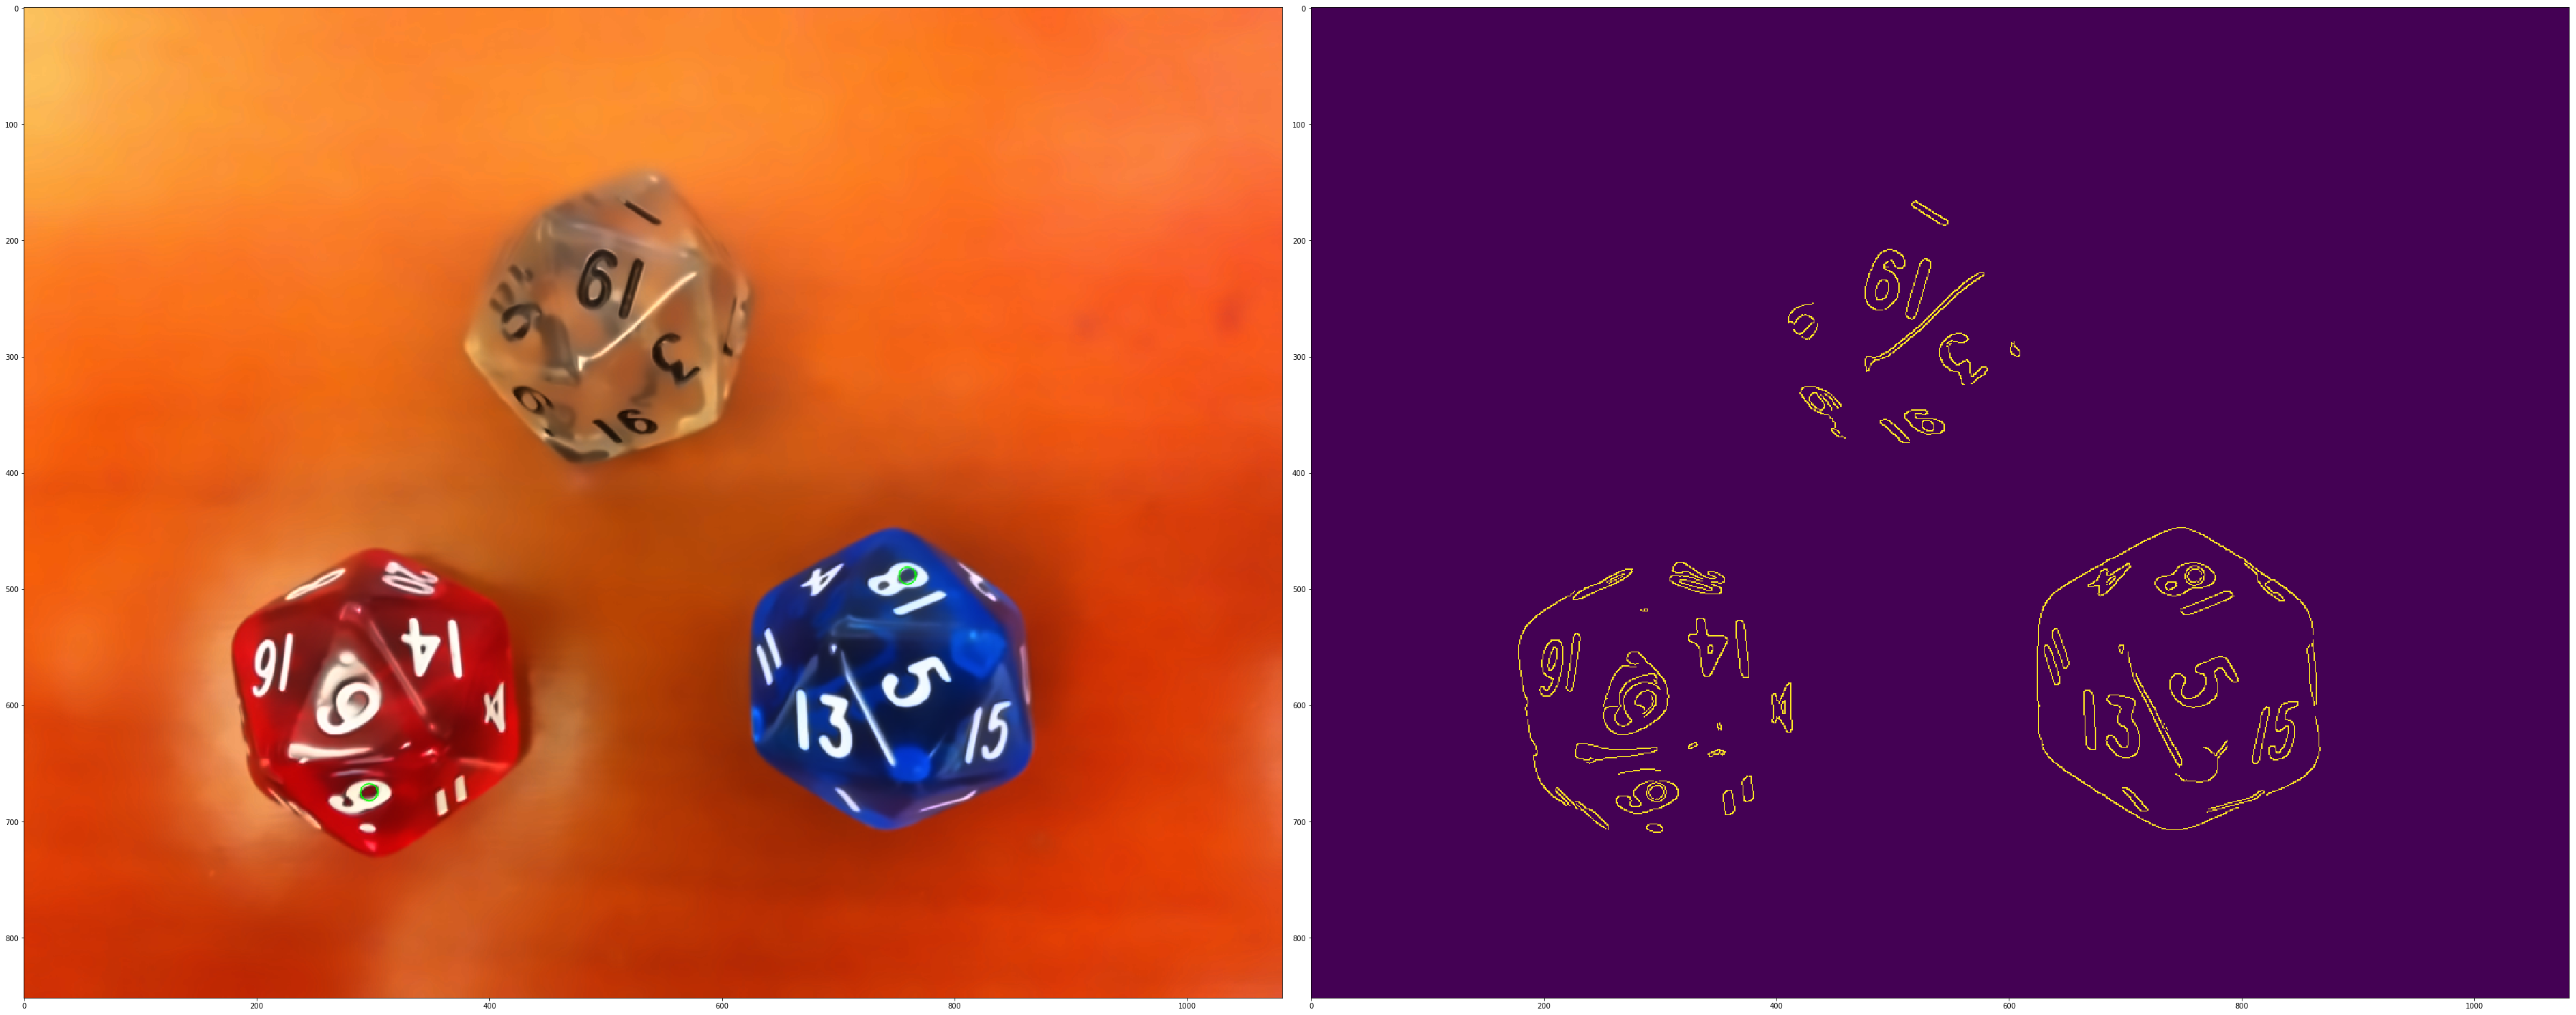

In [174]:
keypoints = detector.detect(denoised_img)                         # keypoints is a list containing the detected blobs.
# here we draw keypoints on the frame.
img_with_keypoints = cv2.drawKeypoints(denoised_img, keypoints, np.array([]), (0, 255, 0),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

full_filter = cv2.Canny(img_with_keypoints,150,400)

f, axarr = plt.subplots(1,2,figsize=(50,50))
axarr[0].imshow(img_with_keypoints, cmap='gray')
axarr[1].imshow(full_filter)

plt.tight_layout()
plt.show()

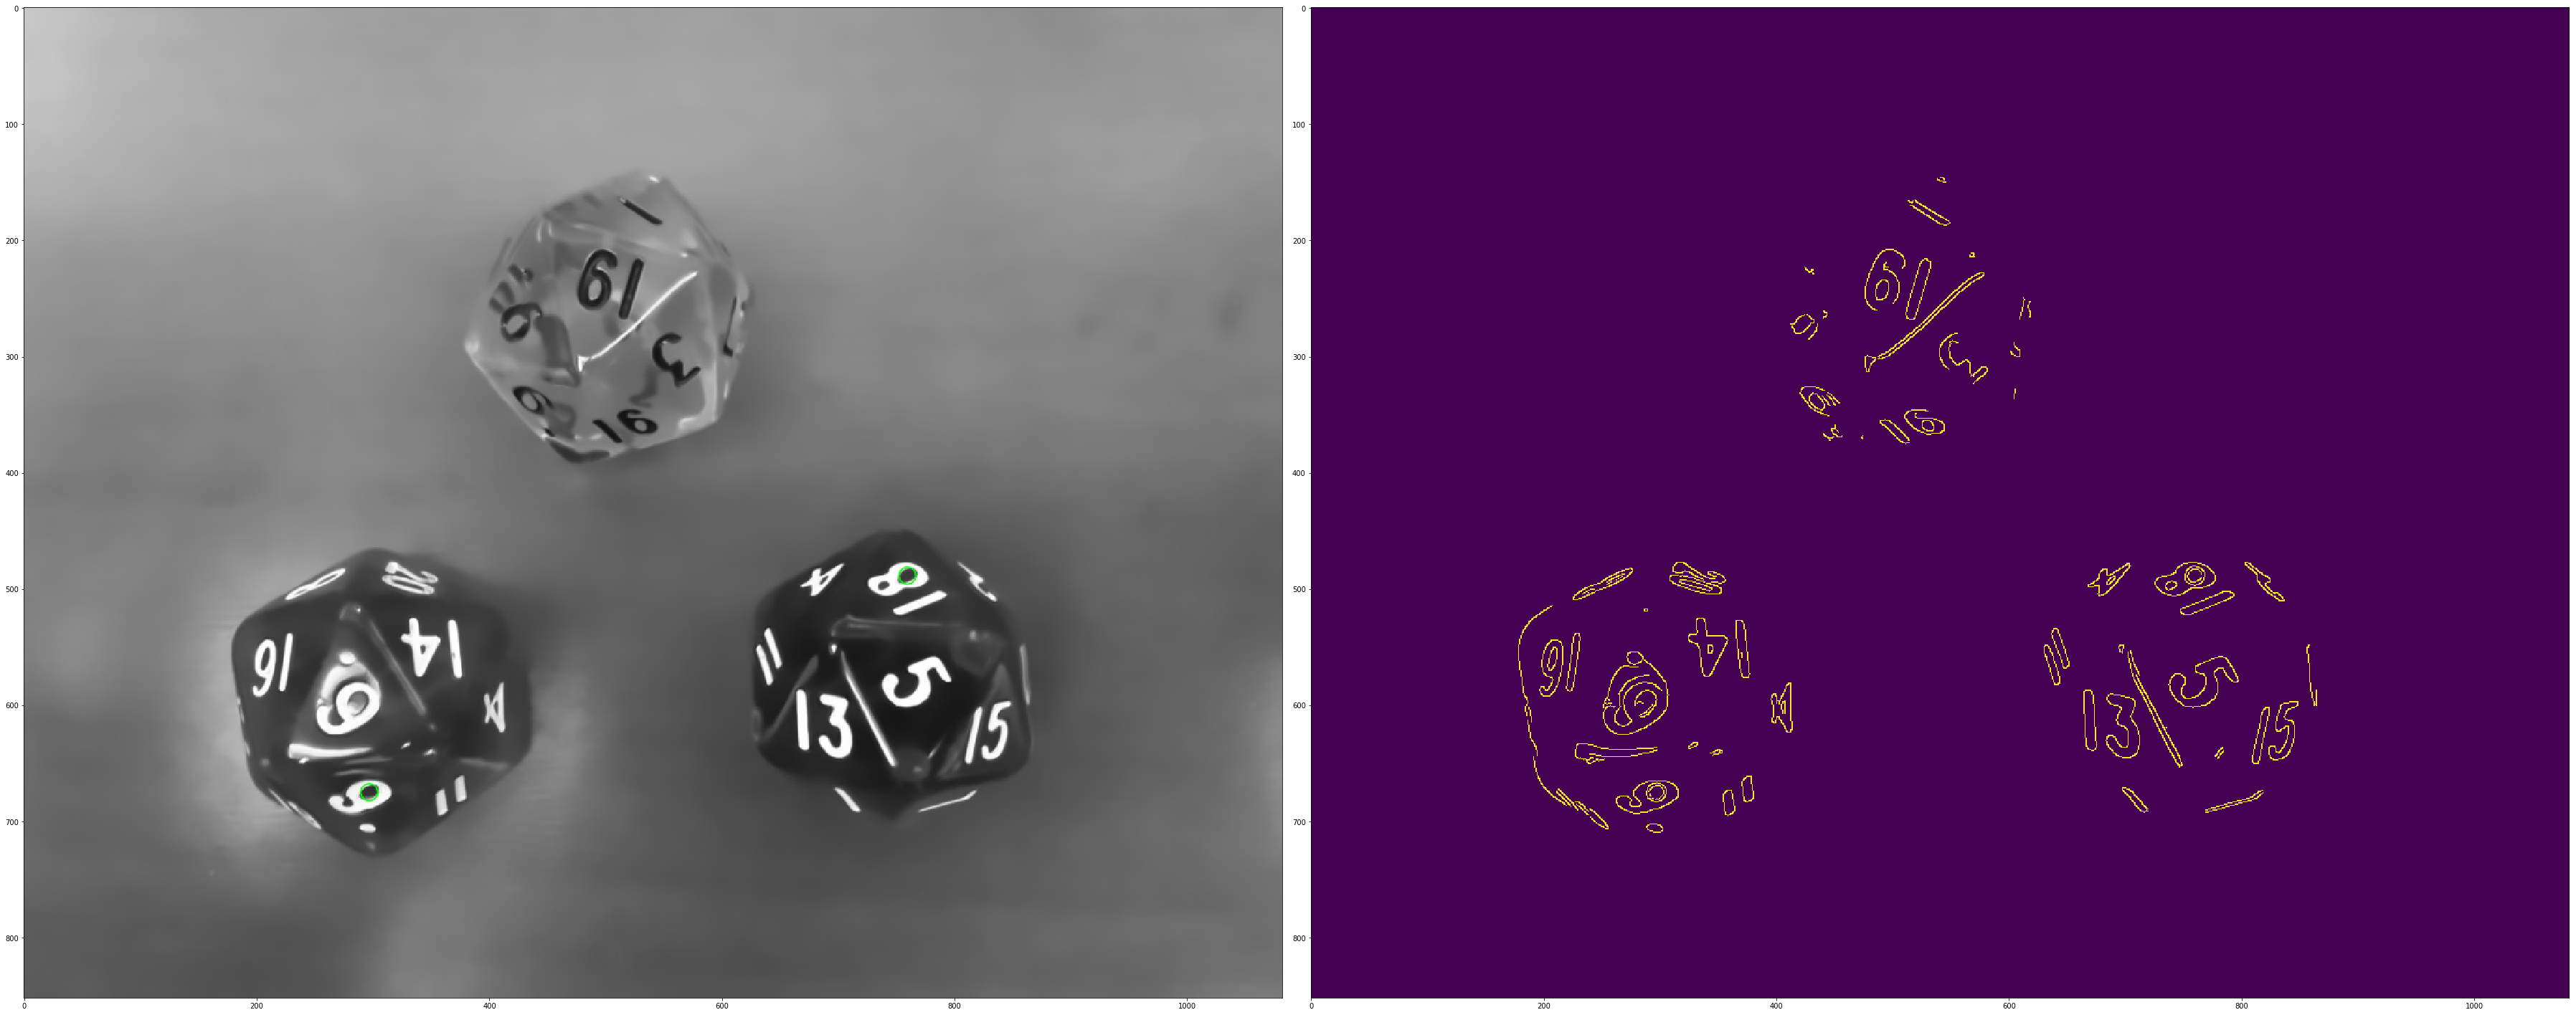

In [152]:
keypoints = detector.detect(grey_denoised_img)                         # keypoints is a list containing the detected blobs.
# here we draw keypoints on the frame.
img_with_keypoints = cv2.drawKeypoints(grey_denoised_img, keypoints, np.array([]), (0, 255, 0),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#draw multiple axes
full_filter = cv2.Canny(img_with_keypoints,200,300)
f, axarr = plt.subplots(1,2,figsize=(50,50))
axarr[0].imshow(img_with_keypoints, cmap='gray')
axarr[1].imshow(full_filter)
plt.tight_layout()
plt.show()

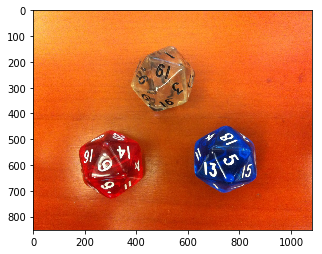

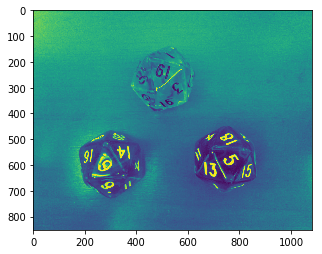

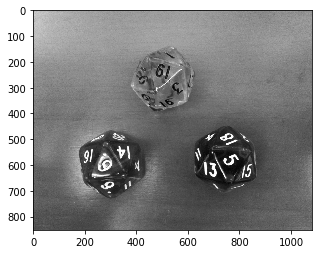

In [138]:
#documentation on how to plot for quick prototyping figsize changes size of img shown
plt.figure(figsize=(5,5))
plt.imshow(img)

#default 'jet' colour map for greyscale
plt.figure(figsize=(5,5))
plt.imshow(grey_img)

#greyscale colour map
plt.figure(figsize=(5,5))
plt.imshow(grey_img, cmap='gray')